# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

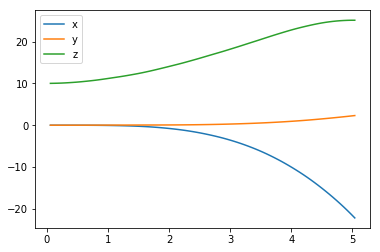

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

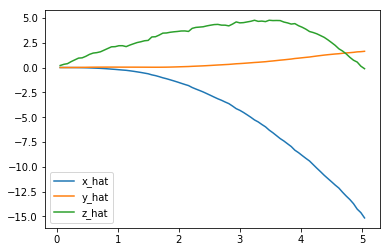

In [6]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

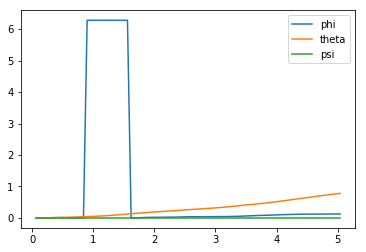

In [8]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

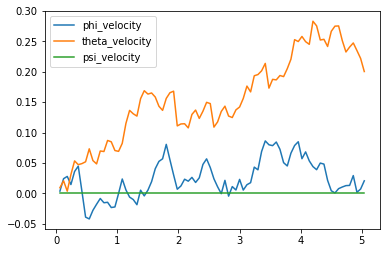

In [9]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

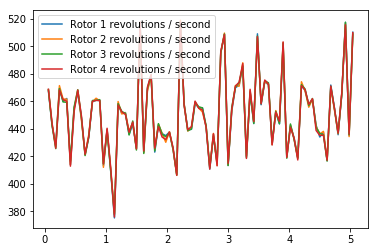

In [10]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [11]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-22.16692169   2.30590561  25.09666099   0.12633167   0.77899156   0.        ]
[-15.14964515   1.63542869  -0.11755038]
[ 0.02070816  0.20052978  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [12]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -0.472 (best =  -0.054), noise_scale = 3.25

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [64]:
## TODO: Train your agent here.
#my target is to get the quadcopter stabilized, in other words, to stop moving, regardless of its position.
#Imagine someone throws the quadcopter in the air before turning it on, 
#or for some reason the quadcopter loses communication with its pilot; in both cases we want it to stay where it is, midair
import sys, shutil, csv
import numpy as np
from agents.agent import Actor, Critic, DDPG
from task import Task


num_episodes = 200


runtime = 5.                                               # time limit of the episode
init_pose = np.array([0.0, 0.0, 1.0, 0.0, 0.0, 0.0])       # initial pose (x,y,z,phi,theta,psi); 
init_velocities = np.array([0.0, 0.0, 0.0])                # initial velocities
init_angle_velocities = np.array([0.0, 0.0, 0.0])          # initial angle velocities
current_sim_filename = "current_sim.txt"                   # file name for saved results
best_sim_filename = "best_sim.txt"                         # file name for saved results
target_pos = 10.0                                          #target position, which is [z]; ie: lift off and hover


task = Task(init_pose=init_pose, init_velocities=init_velocities, 
        init_angle_velocities=init_angle_velocities, runtime=runtime, target_pos=target_pos)
agent = DDPG(task) 


labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity']

best_reward = -np.inf
rewards = []

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    total_reward = 0

    with open(current_sim_filename, 'w') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(labels)
        while True:
            #running the simulation
            action = agent.act(state)
            action4 = action*4
            next_state, reward, done = task.step(action4)
            agent.step(action, reward, next_state, done)
            state = next_state       
            total_reward += reward

            #saving the current simulation on file
            to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v)
            writer.writerow(to_write)
            
            if done:
                #check to see if we found a new best simulation and if so, update
                if total_reward > best_reward:
                    best_reward = total_reward
                    shutil.copyfile(current_sim_filename, best_sim_filename)
                    
                
                #save and print current results
                rewards.append(total_reward)
                print("\rEpisode = {:4d},     total_reward = {:9.3f}     (best = {:9.3f})".format(
                    i_episode, total_reward, best_reward), end="", flush=True)                                
                break

#hard save the rewards per episode because the notebook often loses connexion and thus its variable space
with open("rewards.txt", "w") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(rewards)

Episode =  200,     total_reward =  -281.675     (best =  -163.164)

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

Results of the simulation: current_sim.txt


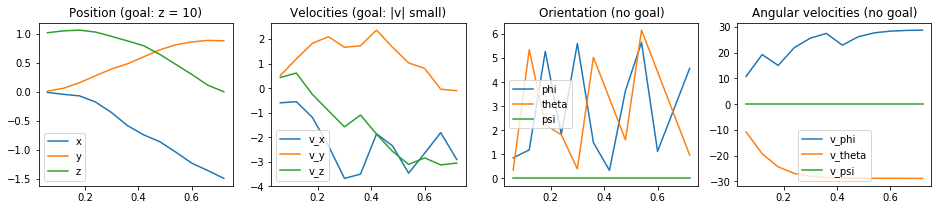

In [68]:
#Plot the best simulation to see if there were unusual stuff(like going out of bounds) and how well it achieved its goal
import pandas as pd
import matplotlib.pyplot as plt


#sim_filename = "best_sim.txt"
sim_filename = "current_sim.txt"

sim = pd.read_csv(sim_filename)
print("Results of the simulation:", sim_filename)

plt.subplots(figsize=(16,3))
plt.subplot(141)
plt.plot(sim['time'], sim['x'], label='x')
plt.plot(sim['time'], sim['y'], label='y')
plt.plot(sim['time'], sim['z'], label='z')
plt.title("Position (goal: z = 10)")
plt.legend()
plt.subplot(142)
plt.plot(sim['time'], sim['x_velocity'], label='v_x')
plt.plot(sim['time'], sim['y_velocity'], label='v_y')
plt.plot(sim['time'], sim['z_velocity'], label='v_z')
plt.title("Velocities (goal: |v| small)")
plt.legend()
plt.subplot(143)
plt.plot(sim['time'], sim['phi'], label='phi')
plt.plot(sim['time'], sim['theta'], label='theta')
plt.plot(sim['time'], sim['psi'], label='psi')
plt.title("Orientation (no goal)")
plt.legend()
plt.subplot(144)
plt.plot(sim['time'], sim['phi_velocity'], label='v_phi')
plt.plot(sim['time'], sim['theta_velocity'], label='v_theta')
plt.plot(sim['time'], sim['psi_velocity'], label='v_psi')
plt.title("Angular velocities (no goal)")
plt.legend()
plt.show()

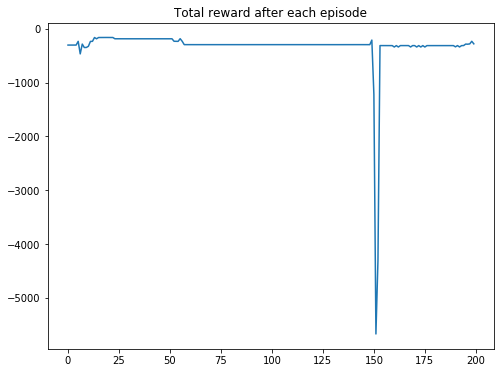

In [69]:
##TODO: plot the rewards
import pandas as pd
import matplotlib.pyplot as plt

load_rewards = pd.read_csv("rewards.txt", header=None)
load_rewards = load_rewards.T
#print(load_rewards)
plt.figure(figsize=(8, 6))
plt.plot(load_rewards[:])
plt.title("Total reward after each episode")

#Sometimes there are enormous dips (ex: most values varie between -200 and 0, but a couple go to -15000)
#This makes the scale so large we don't see the curve very well.
#We can fix this by cutting the graph using ylim:
#plt.ylim(-100,10)

plt.show()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:
Actually, the task is to take-off and hover at height 10. When tried the first time, I wasn't rewared with what I expected but then I noticed that took into account way too much information (all x-y-z and angular positions and speeds). The result was a very chaotic agent that would never converge on anything and its reward would oscillate. So I simplified it to care only about the z position and the z velocity. My function gives a base reward of 1 for every step, thus creating an incentive to keep the episode running as long as possible, hopefully to get the quadcopter to hover once it reaches its target position. I then added a penalty based on the difference between its current height and the target height. The agent is thus incentivised to stay as close as possible to the target position. However, I had trouble getting good results, and often the agent would crash, deciding that an early termination was the best way to amass a not too large debt. So I reduced the weight of that penalty to 0.01. It still caused issue, because if the weight is too low, then the agent simply flies off into the distance and reaps the +1 baseline reward for a long episode. So I tampered it with a penalty for its z velocity. This effectively creates an incentive for the agent to keep a z speed as close to 0 as possible. This way the agent should take off more slowly, thus not overshoot his target height too much, and ideally it would hover at the target height with 0 z velocity. At least that's the goal, because the agent currently flies off at max speed.

In order to reduce the amount of information being fed to the agent, I changed the action-state space in the task. Now instead of having 4 rotors to control, the agent only has 1 and its speed is being fed to all four rotors in the simulation. This avoids lateral movement and allows the agent to focus on only target to optimize. Also, I removed all the environment information except the z-position being fed to the agent. This is especially useful since all angular positions and velocities as well as x and y positions and velocities remain at 0 all the time since all 4 rotors are bound to the same speed.

I tried changing the actor-critique model a lot, but it never led to such dramatic changes in behavior as the reward function does. That's why I think the reward function is what has the most impact on the agent. 

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:
I used the actor-critique algorithm as suggested. I tried to add tons of layers and batch normalization and increase the number of nodes and add regularization, but nothing beat the default architecture. Adding more layers only increases complexity and reduces compute time without any added benefit to the convergence of the agent.

I also played with all hyperparameters, but the default seemed the best. For instance: increasing the buffer size and batch size slow down the computation time without increasing accuracy. Reducing the gamma (discount factor) causes the agent to focus more on short term goals. This made him favor crashing scenarios, but it is less impactful than changing the reward function. Increasing tau adds more volatilty to the agent's learning, making it longer to converge. Changing mu (long-term convergence of the noise) means that there will always be noise and thus the agent will never stop exploring. This prevents it from converging to a solution, or if you let it run long enough (2000+ episodes) you will see it oscillate between the same two very similar rewards. Changing theta (rate of reversion to mean for the noise) determines how long the agent will keep exploring. Increase it for longer convergence and hoping to get out of local minimas. What I found was that it only increased the volality and did not help in finding a better solution. Same thing with sigma, the starting volatilty of the noise.

I found that changing the hyperparameters slightly had no or little visible effect on the agent's learning, and changing the parameters drastically broke the model (learning becomes all over the place and never converges). Also, some hyperparameters have the same effect as changing the reward function. For example, reducing the baseline reward is the same as reducing gamma.

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:
This wasn't an easy project. Originally, I tried training a more complicated task beyond hover, but ultimately ran into so much trouble I had to throw it out and restart with just hovering. Even then I found the hover task was difficult, requiring me to simplify the task at hand.

The current setting is a result of the simplifications I did to the task and agent. Now the problem is so simplified that there are a couple of solutions with consistent rewards regardless of the small exploration noise; each plateau is one such solution. 
For the hover task, it was suggested to me from the slack channel to try setting the rotor speeds to all the same (not allowing the agent to dictate otherwise). Per suggestion and experimentation, I also found that limiting the action space of the agent improved results.

In the end, the agent had an mean reward score of 299 for last 10 episodes. The score was improving slower and staying within a close range episode to episode - suggesting stability in the task!

In [70]:
# Final Performance 
print("Final Performance (Mean Reward over last 10 episodes): {}".format(np.sum(load_rewards[-10:])/10))

Final Performance (Mean Reward over last 10 episodes): 0   -299.21106
dtype: float64


**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:
The hardest part is figuring out how to write the agent, until I realized that you guys provided one. Then it would be to tweak it to get the desired performance. I'm quite disappointed that I barely got the take-off and hover task. I tried other tasks, like one in which we give initial velocities and angular momentums and ask the agent to stabilize its flight, but this is far beyond its current capabilities.

Once I realised that changing the architecture of the agent was pointless, I spent all my efforts on the reward function. This is where things started to change, but never did I hit the sweet spot where an agent actually learns something and converges to a good solution.